# Sentiment Analysis of Recipe Reviews

We begin by importing the required libraries and methods using the import...as keyword

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

#### Read dataset containing recipe reviews (Recipe Reviews and User Feedback Dataset.csv) from local working directory:
recipe_df = pd.read_csv("your filepath")

In [ ]:
recipe_df = pd.read_csv('C:/Users/Enigma/Desktop/app.stackup.dev/sentiment-analysis-4/Recipe Reviews and User Feedback Dataset.csv',encoding='latin-1')

#### Inspect your DF (Data Frame):
recipe_df.head()

In [ ]:
recipe_df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


Next we will clean text from punctuations, symbols and preprocess recipe data frame to make it suitable to analyse and model data frame by employing the regular expression and contraction libraries 

In [ ]:
# Function to clean text from any kind of punctuation and other symbols
import re
def clean_text(text):
    # For input of a non-string type
    if not isinstance(text, str):
        return str(text)
    cleaned_text = re.sub(r'[^a-zA-Z\s\d]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

In [ ]:
# Preprocessing
#pip or pip3 install contractions 
import contractions
recipe_df['text'] = recipe_df['text'].str.lower()
recipe_df['text'] = recipe_df['text'].apply(clean_text)
recipe_df['text'] = recipe_df['text'].apply(contractions.fix)

In [ ]:
recipe_df['text']

0        i tweaked it a little removed onions because o...
1        bush used to have a white chili bean and it ma...
2        i have a very complicated white chicken chili ...
3        in your introduction you mentioned cream chees...
4        wonderful i made this for a 34chilistew34 nigh...
                               ...                        
18177    this strawberry cake has been a family favorit...
18178    pi received endless compliments on this cake i...
18179    this cake was delicious and so moist i didn39t...
18180    i just made this too it is wonderful as for th...
18181    omg you must make this cake i made it for my s...
Name: text, Length: 18182, dtype: object

Analyse the distribution of text lengths

In [ ]:
review_len = []
for review in recipe_df['text']:
    review_len.append(len(review))

In [ ]:
recipe_df['review_len'] = review_len

In [ ]:
total_words = []
for review in recipe_df['text']:
    total_words.append(len(review.split()))

In [ ]:
recipe_df['total_words'] = total_words

In [ ]:
# Check Some of reviews
print(recipe_df['text'][5])
print("#"*30)
print(recipe_df['text'][50])
print("#"*30)
print(recipe_df['text'][100])
print("#"*30)
print(recipe_df['text'][500])
print("#"*30)
print(recipe_df['text'][1000])

amazing my boyfriend loved it so much going to make it again this week
##############################
we have been making this for years now and its hands down our favorite chili recipe one thing i love about it is that you can substitute low fat versions of the creamsour cream and its still just as good i39ve even used skim milk in place of the whipping cream with no problems we always serve it with the zucchini amp cheese drop biscuits to die for
##############################
besides being delicious it39s greatest strengths are it soooooo easy and quick the only thing i did differently is used 1 can of garbanzo beans and 1 can of no beans didn39t have 2 cans of northerns i too simmered it a bit longer to make it more chililike
##############################
love this chili even without the sour cream
##############################
my wife found this recipe in toh several years ago the name is right it really is the best ever depends on your oven on how long it needs to bake


In [ ]:
recipe_df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,review_len,total_words
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,i tweaked it a little removed onions because o...,345,67
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,bush used to have a white chili bean and it ma...,137,28
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,i have a very complicated white chicken chili ...,346,63
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,in your introduction you mentioned cream chees...,91,15
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,wonderful i made this for a 34chilistew34 nigh...,223,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emilyâs Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,this strawberry cake has been a family favorit...,118,21
18178,115,100,82745,Mamaw Emilyâs Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,pi received endless compliments on this cake i...,291,55
18179,116,100,82745,Mamaw Emilyâs Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,this cake was delicious and so moist i didn39t...,321,59
18180,117,100,82745,Mamaw Emilyâs Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,i just made this too it is wonderful as for th...,179,37


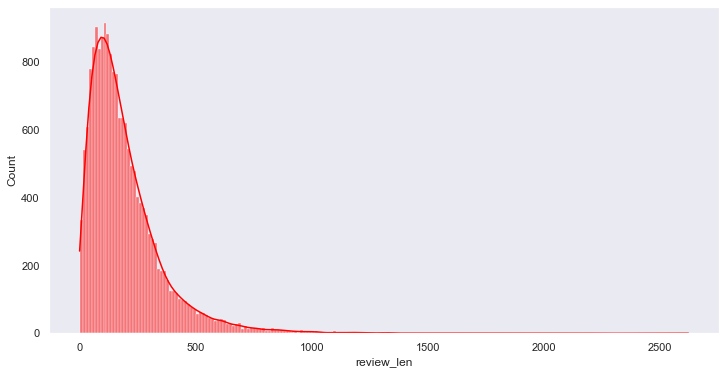

In [ ]:
#Checking distrubution of reviews length
plt.figure(figsize=(12, 6))
sns.histplot(recipe_df['review_len'],color='red',kde=True)
plt.grid(False)
plt.show()

In [ ]:
indexes = recipe_df[recipe_df['review_len']<10].index

In [ ]:
recipe_df.drop(indexes,axis=0,inplace=True)

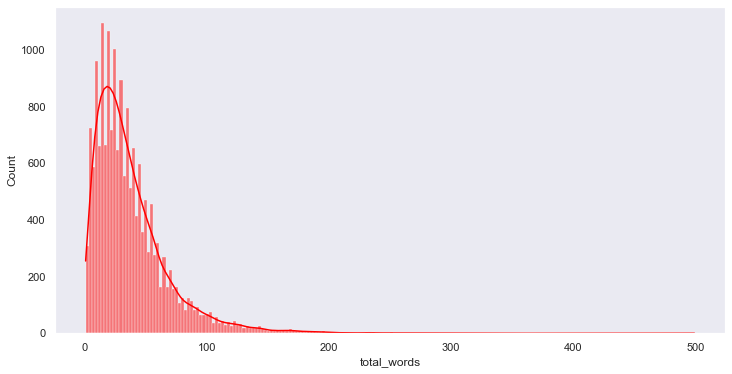

In [ ]:
#Checking distrubution of total words
plt.figure(figsize=(12, 6))
sns.histplot(recipe_df['total_words'],color='red',kde=True)
plt.grid(False)
plt.show()

### Classification Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
# checking categories of dataset
recipe_df['stars'].unique()

array([5, 0, 4, 3, 1, 2], dtype=int64)

In [ ]:
from langdetect import detect
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [ ]:
status = []
for i in recipe_df['text']:
    status.append(is_english(i))

In [ ]:
recipe_df['english_status'] = status

In [ ]:
recipe_df['english_status'].dtype

dtype('bool')

In [ ]:
false_indexes = recipe_df[recipe_df['english_status']==False].index

In [ ]:
recipe_df.drop(false_indexes,axis=0,inplace=True)

In [ ]:
# Checking data imbalance
recipe_df['stars'].value_counts()

5    13411
0     1656
4     1607
3      475
1      267
2      227
Name: stars, dtype: int64

With the data collected, we will now proceed to install textblob. Ensure that you have 'TextBlob' downloaded so that we can begin using TextBlob for our sentiment analysis

In [ ]:
# pip or pip3 install textblob
from textblob import TextBlob
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
# Apply sentiment analysis to reviews
recipe_df['sentiment_score'] = recipe_df['text'].apply(get_sentiment_polarity)
# Group by star ratings and calculate average sentiment scores
average_sentiments = recipe_df.groupby('stars')['sentiment_score'].mean()
# Map sentiment scores to star ratings
threshold = 0.2  # Adjust the threshold as needed

recipe_df['predicted_stars'] = recipe_df['sentiment_score'].apply(lambda x: 5 if x > 0.4 else(4 if x > 0.2 else(3 if x > -0.2 else(2 if x > -0.4 else 1))))


In [ ]:
recipe_df['predicted_stars'].value_counts()

5    6425
4    5607
3    5347
2     175
1      89
Name: predicted_stars, dtype: int64

In [ ]:
# since data is imbalance, hence, splitting ham and spam seperately to make balance data
rating_5 = recipe_df[recipe_df['predicted_stars']==5]
rating_4 = recipe_df[recipe_df['predicted_stars']==4]
rating_3 = recipe_df[recipe_df['predicted_stars']==3]
rating_2 = recipe_df[recipe_df['predicted_stars']==2]
rating_1 = recipe_df[recipe_df['predicted_stars']==1]

In [ ]:
print(rating_5.shape,rating_4.shape,rating_3.shape,rating_2.shape,rating_1.shape)

(6425, 20) (5607, 20) (5347, 20) (175, 20) (89, 20)


In [ ]:
rating_4 = rating_4.sample(rating_5.shape[0], replace=True)
rating_3 = rating_3.sample(rating_5.shape[0], replace=True)
rating_2 = rating_2.sample(rating_5.shape[0], replace=True)
rating_1 = rating_1.sample(rating_5.shape[0], replace=True)

In [ ]:
print(rating_5.shape,rating_4.shape,rating_3.shape,rating_2.shape,rating_1.shape)

(6425, 20) (6425, 20) (6425, 20) (6425, 20) (6425, 20)


In [ ]:
# Concatenate the DataFrames vertically in the specified order
recipe_df = pd.concat([rating_5, rating_4, rating_3, rating_2, rating_1], ignore_index=True)

In [ ]:
recipe_df.shape

(32125, 20)

In [ ]:
#Splitting data into dependent and indepent variable
x = recipe_df['text']
y = recipe_df['predicted_stars']

In [ ]:
x.head()

0    amazing my boyfriend loved it so much going to...
1    wow this recipe is excellent as written the on...
2                  best and easiest white chili recipe
3    delicious if you like a mild chilli taste this...
4              my new favorite soup oh my so delicious
Name: text, dtype: object

In [ ]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: predicted_stars, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Get NLTK's English stop words
nltk_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enigma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocess the text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words=nltk_stop_words)  # Adjust max_features as needed
x_tfidf = tfidf_vectorizer.fit_transform(x)

In [ ]:
x_tfidf

<32125x14034 sparse matrix of type '<class 'numpy.float64'>'
	with 529435 stored elements in Compressed Sparse Row format>

In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,train_size=.80,stratify=y,random_state=121)

In [ ]:
# Model building Naive Bayes
model = MultinomialNB()
# Training the model with the training data
model.fit(x_train, y_train)
# Predicting the test data categories
predicted_categories = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming predicted_categories are the predicted labels for x_test

confusion = confusion_matrix(y_test, predicted_categories)

class_names = np.unique(np.concatenate((y_test, predicted_categories), axis=0))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
accuracy = accuracy_score(y_test, predicted_categories)
print("Accuracy:", accuracy)

Accuracy: 0.8010894941634241


In [ ]:
#Model Building Logistic Regression
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(multi_class='multinomial', solver='saga',class_weight='balanced',penalty='l2', C=10)
# Training Model with training data 
model_1.fit(x_train,y_train)
# Predicting the test data categories
pred = model_1.predict(x_test)

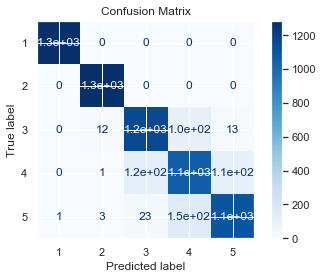

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming predicted_categories are the predicted labels for x_test
confusion = confusion_matrix(y_test, pred)

class_names = np.unique(np.concatenate((y_test, pred), axis=0))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9159533073929961


In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9159533073929961


In [ ]:
from datetime import datetime

# Change column with Unix timestamps to conventional time
recipe_df['created_at'] = recipe_df['created_at'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
recipe_df['date'] = pd.to_datetime(recipe_df.created_at).dt.date
recipe_df['time'] = pd.to_datetime(recipe_df.created_at).dt.time

In [ ]:
recipe_df = recipe_df.drop(["Unnamed: 0","recipe_code","recipe_number","thumbs_up","comment_id","user_id","user_name","user_reputation","reply_count","thumbs_down","best_score","stars","review_len","total_words","english_status","created_at"], axis=1)
recipe_df

,recipe_name,text,sentiment_score,predicted_stars,date,time
0,Creamy White Chili,amazing my boyfriend loved it so much going to...,0.500000,5,2022-08-24,15:19:11
1,Creamy White Chili,wow this recipe is excellent as written the on...,0.480952,5,2022-02-05,19:20:05
2,Creamy White Chili,best and easiest white chili recipe,0.500000,5,2022-01-25,16:21:23
3,Creamy White Chili,delicious if you like a mild chilli taste this...,0.511111,5,2022-01-07,18:05:04
4,Creamy White Chili,my new favorite soup oh my so delicious,0.545455,5,2021-11-21,18:56:20
...,...,...,...,...,...,...
32120,Flavorful Pot Roast,so disappointing not good at all threw it all out,-0.475000,1,2021-06-03,10:54:58
32121,Best Ever Potato Soup,i can39t see a reason for adding milk to a hea...,-0.800000,1,2021-06-03,11:04:30
32122,Creamy White Chili,i39m confused in the description it says 34may...,-0.400000,1,2021-06-03,11:05:37
32123,Cauliflower Soup,i found this soup so bland and runny i even us...,-0.583333,1,2021-06-03,11:04:05


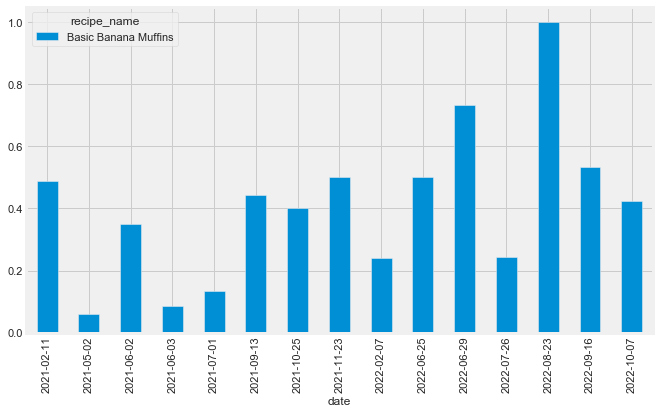

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Filter the DataFrame for the specific recipe
recipe_filtered = recipe_df[recipe_df['recipe_name'] == 'Basic Banana Muffins']

# Group by date and calculate the mean sentiment score
mean_c = recipe_filtered.groupby(['date','recipe_name'])
mean_c = mean_c['sentiment_score'].mean()

# unstack column recipe_name
mean_c = mean_c.unstack('recipe_name')

# Plot a bar chart with pandas
mean_c.plot.bar(figsize=(10, 6));

 we now proceed to explore deeper, what is the sentiment within a particular day. Let's zoom in on 2nd June 2021 (i.e. "2019-06-02") to analyze the reviews on Basic Banana Muffins.

In [ ]:
recipe_filtered['date'] = pd.to_datetime(recipe_filtered['date'])

# Filter the dataset for the date
filtered_df = recipe_filtered[recipe_filtered['date'] == '2021-06-02']
filtered_df = filtered_df.set_index(['recipe_name', 'date'])
filtered_df = filtered_df.xs('Basic Banana Muffins')

# Set the index of filtered_df to time 
filtered_df = filtered_df.set_index('time')

# Sort by index
filtered_df = filtered_df.sort_index()

filtered_df

,text,sentiment_score,predicted_stars
time,,,
15:47:53,this is absolutely delicious my family loves w...,0.416667,5
15:48:01,amazing i made it with gluten free flour and s...,0.466667,5
15:48:01,these are a hit in our house and when shared w...,0.246667,4
15:48:01,this is an excellent base recipe i39ve made se...,0.271131,4


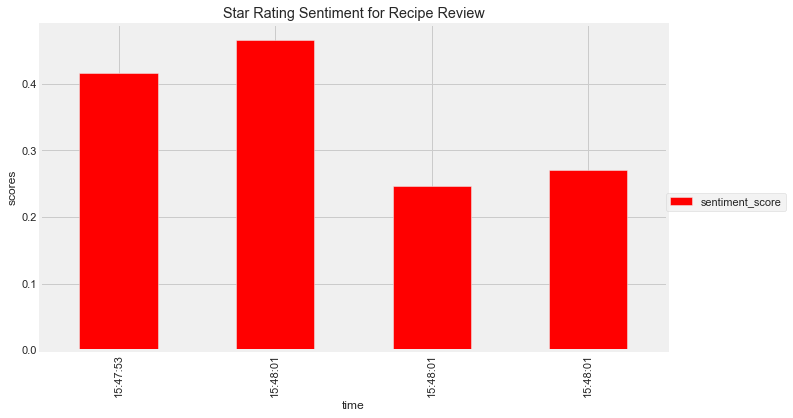

In [ ]:
TITLE = "Star Rating Sentiment for Recipe Review"
COLORS = ["red"]

plot_day = filtered_df.drop(['text', 'predicted_stars'], axis=1)
# Change the column names to 'sentiment_score'
plot_day.columns = ['sentiment_score']

# Plot a bar chart
plot_day.plot.bar(figsize=(10, 6), title=TITLE, color=COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel('scores');

## Sentiment Analysis for Recipe Reviews
This sentiment analysis project focuses on evaluating the sentiment of user reviews in a comprehensive repository of data called Recipe Reviews and User Feedback Dataset. The dataset includes columns such as 'text', 'recipe_name', and 'stars', and the analysis aims to visualize the sentiment trends over time. The 'text' column contains user-generated reviews, 'sentiment_score' which was generated by the use of TextBlob library, quantifies the sentiment of each review, and 'predicted_stars' indicates the star rating predicted from sentiment analysis.

Initially, the project involved cleaning the data and preparing it for analysis. The sentiment scores were categorized with a threshold of 0.2 into five bins, representing different sentiment levels categorized as 'predicted_stars'. The analysis further involved creating a bar chart with time on the x-axis and sentiment scores on the y-axis. This visualization provides insights into how sentiment varies over time and allows for the identification of trends.

Classification and vectorization was used to train and model data to a more balanced distribution, stop words was used to remove words that do not contribute to distinguished between sentiments hence improve the performance of machine learning models. Sentiment analysis was carried out on a small sample of recipe, on a specific day 2021-06-02 to ascertain the rating of 'Basic Banana Muffins' by the reviewer using the sentiment score.

Despite encountering challenges in implementation, this sentiment analysis project aimed to provide a comprehensive understanding of the sentiment dynamics within the recipe reviews dataset. The visualizations and data manipulations were designed to uncover patterns and trends in user sentiments, contributing valuable insights for recipe recommendations or improvements.